In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set_style('darkgrid')

warnings.filterwarnings('ignore')
np.random.seed(42)

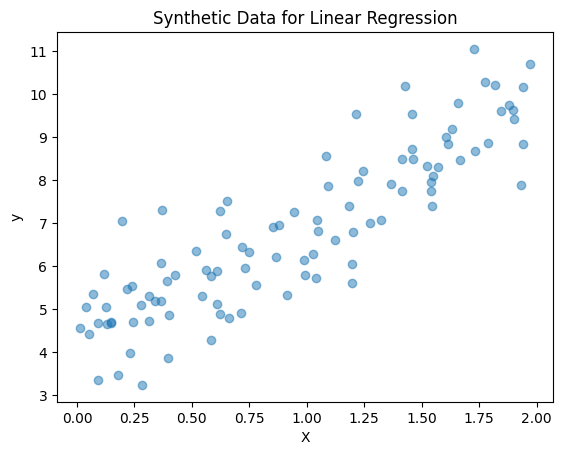

Slope (Coefficient): 2.7701133864384806
Intercept: 4.21509615754675


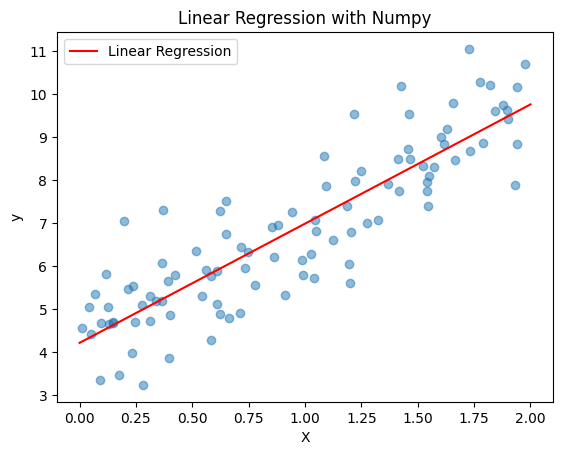

In [32]:
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Linear Regression using Numpy
X_b = np.c_[np.ones((100, 1)), X]  # Add bias term to X
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Get the slope (coefficient) and intercept of the linear regression line
intercept, slope = theta_best[0], theta_best[1]

print(f"Slope (Coefficient): {slope[0]}")
print(f"Intercept: {intercept[0]}")

# Predictions using the trained model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term to X_new
y_pred = X_new_b.dot(theta_best)

# Plot the linear regression line
plt.scatter(X, y, alpha=0.5)
plt.plot(X_new, y_pred, color='red', label='Linear Regression')
plt.title('Linear Regression with Numpy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [27]:
sample_text

'Contact us at support@example.com or visit our website.'

## Scenario2

In [ ]:
blue_classes_mean = np.array([1,0])
orange_classes_mean = np.array([0,1])

mu_blue = stats.multivariate_normal.rvs(mean=blue_classes_mean, cov=1,size=10)
mu_orange = stats.multivariate_normal.rvs(mean=orange_classes_mean, cov=1,size=10)


mu_0 = mu_blue[np.random.choice(10,1),:].reshape(2,)
X = stats.multivariate_normal.rvs(mean=mu_0, cov=np.eye(2)/5,size=10)

for i in range(9):
    idx = np.random.choice(10,1)
    mu_i = mu_blue[idx,:].reshape(2,)
    tmp = stats.multivariate_normal.rvs(mean=mu_i, cov=np.eye(2)/5,size=10)
    X = np.concatenate([X,tmp], axis=0)

for i in range(10):
    idx = np.random.choice(10,1)
    mu_i = mu_orange[idx,:].reshape(2,)
    tmp = stats.multivariate_normal.rvs(mean=mu_i, cov=np.eye(2)/5,size=10)
    X = np.concatenate([X,tmp], axis=0)

y = np.zeros((200,1)).reshape(-1,1)
y[100:] = 1

df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y.flatten()})
df.head()

,x1,x2,y
0,1.745467,1.917365,0.0
1,1.196412,0.814959,0.0
2,1.993698,1.282366,0.0
3,1.045436,1.129217,0.0
4,1.142090,1.583148,0.0


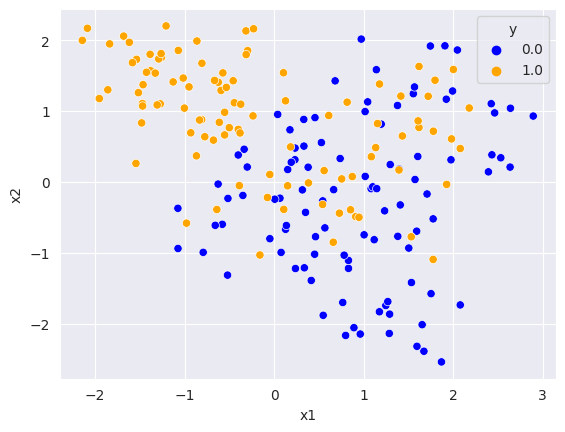

In [ ]:
palette = {0: 'blue', 1: 'orange'}
sns.scatterplot(x='x1', y='x2', hue='y', palette=palette, data=df)
plt.show()

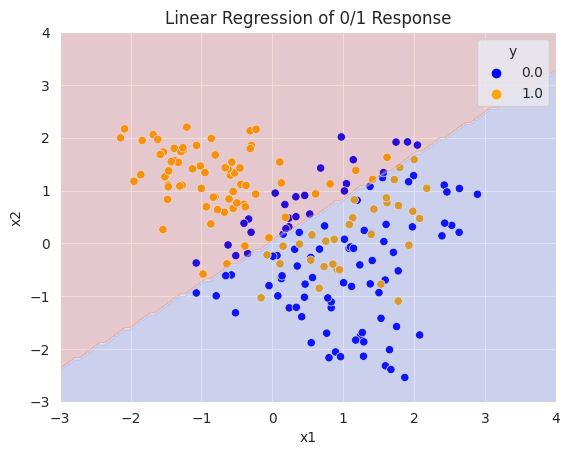

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(-3, 4, 100).reshape(-1, 1),
        np.linspace(-3, 4, 100).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

desinged_X = np.c_[np.ones(len(y)),X]
beta_hat = np.linalg.inv(desinged_X.T @ desinged_X) @ desinged_X.T @ y

X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]
y_pred = X_new_with_bias @ beta_hat
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

sns.scatterplot(x='x1', y='x2', hue='y', palette=palette, data=df)
plt.contourf(x0, x1, y_pred.reshape(x0.shape), alpha=0.2,cmap='coolwarm')
plt.title("Linear Regression of 0/1 Response")
plt.show()

In [ ]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):

        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        dists = np.sqrt(np.sum(self.X_train**2, axis=1) + np.sum(X**2, axis=1).reshape(num_test,1) - 2*X.dot(self.X_train.T))

        return self.predict_labels(dists, k=k)

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i,:])[:k]]
            val, cnt = np.unique(closest_y, return_counts=True)
            y_pred[i] = val[np.argmax(cnt)] # majority vote in the neighborhood
        return y_pred

In [ ]:
classifier = KNearestNeighbor()
classifier.train(X, y)

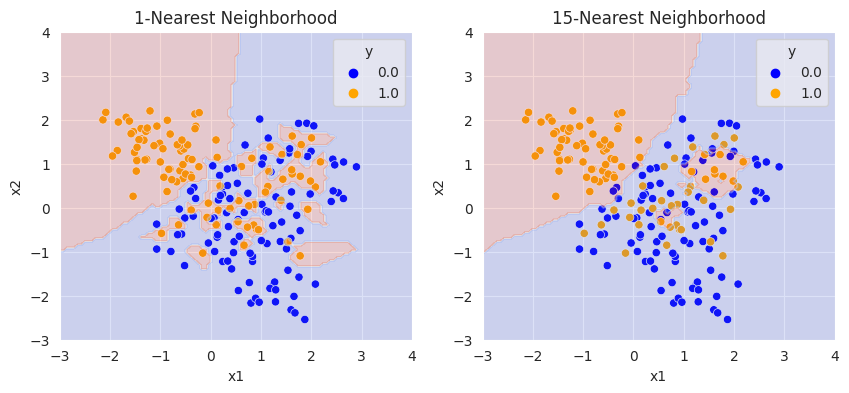

In [ ]:
y_pred = classifier.predict(X_new, k=1)
y_pred_15 = classifier.predict(X_new, k=15)

plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.scatterplot(x='x1', y='x2', hue='y', palette=palette, data=df)
plt.contourf(x0, x1, y_pred.reshape(x0.shape), alpha=0.2,cmap='coolwarm')
plt.title("1-Nearest Neighborhood")

plt.subplot(122)
sns.scatterplot(x='x1', y='x2', hue='y', palette=palette, data=df)
plt.contourf(x0, x1, y_pred_15.reshape(x0.shape), alpha=0.2,cmap='coolwarm')
plt.title("15-Nearest Neighborhood")

plt.show()

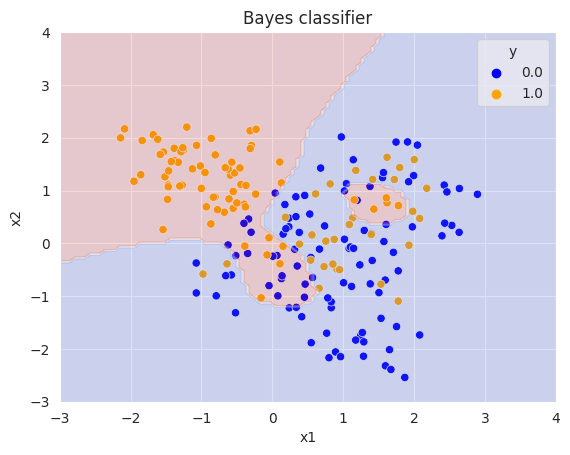

In [ ]:
def bayes_classifer(X_new):
    p_blue, p_orange = np.zeros(X_new.shape[0]), np.zeros(X_new.shape[0])
    for i in range(len(mu_orange)):
        p_blue += stats.multivariate_normal(mean=mu_blue[i], cov=np.eye(2)/5).pdf(X_new)
        p_orange += stats.multivariate_normal(mean=mu_orange[i], cov=np.eye(2)/5).pdf(X_new)

    bayes_pred = (p_blue < p_orange)
    bayes_pred = bayes_pred.astype(int)
    return bayes_pred

bayes_pred = bayes_classifer(X_new=X_new)
sns.scatterplot(x='x1', y='x2', hue='y', palette=palette, data=df)
plt.contourf(x0, x1, bayes_pred.reshape(x0.shape), alpha=0.2,cmap='coolwarm')
plt.title("Bayes classifier")
plt.show()

In [ ]:
k_array = np.array([151,101,69,45,31,21,11,7,5,3,1])
mu_0 = mu_blue[np.random.choice(10,1),:].reshape(2,)
X_test = stats.multivariate_normal.rvs(mean=mu_0, cov=np.eye(2)/5,size=50)
train_err, test_err = [], []

for i in range(99):
    idx = np.random.choice(10,1)
    mu_i = mu_blue[idx,:].reshape(2,)
    tmp = stats.multivariate_normal.rvs(mean=mu_i, cov=np.eye(2)/5,size=50)
    X_test = np.concatenate([X_test,tmp], axis=0)

for i in range(100):
    idx = np.random.choice(10,1)
    mu_i = mu_orange[idx,:].reshape(2,)
    tmp = stats.multivariate_normal.rvs(mean=mu_i, cov=np.eye(2)/5,size=50)
    X_test = np.concatenate([X_test,tmp], axis=0)

y = np.zeros(200)
y[100:] = 1
y_test = np.zeros(10000)
y_test[5000:] = 1


#bayes classifier
y_pred_train_bayes = bayes_classifer(X_new=X)
y_pred_test_bayes = bayes_classifer(X_new=X_test)

num_correct_train_bayes = np.sum(y_pred_train_bayes == y)
num_correct_test_bayes = np.sum(y_pred_test_bayes == y_test)

err_train_bayes = 1- float(num_correct_train_bayes) / len(y)
err_test_bayes = 1- float(num_correct_test_bayes) / len(y_test)


# knn
for k in k_array:
    y_pred_train = classifier.predict(X, k=k)
    y_pred_test = classifier.predict(X_test, k=k)

    num_correct_train = np.sum(y_pred_train == y)
    num_correct_test = np.sum(y_pred_test == y_test)

    acc_train = float(num_correct_train) / len(y)
    acc_test = float(num_correct_test) / len(y_test)

    train_err.append(1 - acc_train)
    test_err.append(1 - acc_test)

In [ ]:
y_pred_linear = desinged_X @ beta_hat
y_pred_linear[y_pred_linear <= 0.5] = 0
y_pred_linear[y_pred_linear > 0.5] = 1

desinged_X_test = np.c_[np.ones(len(y_test)),X_test]
y_pred_linear_test = desinged_X_test @ beta_hat
y_pred_linear_test[y_pred_linear_test <= 0.5] = 0
y_pred_linear_test[y_pred_linear_test > 0.5] = 1

num_correct_train_lin = np.sum(y_pred_linear == y.reshape(-1,1))
num_correct_test_lin = np.sum(y_pred_linear_test == y_test.reshape(-1,1))

acc_train_linear = float(num_correct_train_lin) / len(y)
acc_test_linear = float(num_correct_test_lin) / len(y_test)

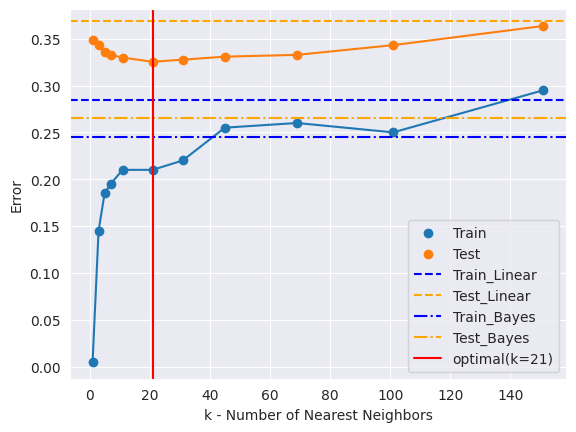

In [ ]:
plt.scatter(k_array, train_err, label ='Train')
plt.plot(k_array, train_err)
plt.scatter(k_array, test_err, label='Test')
plt.plot(k_array, test_err)
plt.axhline(1-acc_train_linear, color='blue', linestyle='--', label='Train_Linear')
plt.axhline(1-acc_test_linear, color='orange', linestyle='--', label='Test_Linear')

plt.axhline(err_train_bayes, color='blue', linestyle='-.', label='Train_Bayes')
plt.axhline(err_test_bayes, color='orange', linestyle='-.', label='Test_Bayes')

plt.axvline(21,color='red', label='optimal(k=21)')

plt.xlabel("k - Number of Nearest Neighbors")
plt.ylabel("Error")
plt.legend()
plt.show()

## Curse of dim

In [ ]:
def get_Y_exp(X,dim=2):
    return np.exp(-8*np.sum(X[:,:dim]**2,axis=1))

def get_Y_x1(X):
    return 0.5 * ((X[:,0]+1)**3)

mse1 = np.zeros(10)
mse2 = np.zeros(10)
y_hat1 = np.zeros((100,10))
y_hat2 = np.zeros((100,10))

for t in range(100):
    X = stats.uniform(loc=-1,scale=2).rvs(size=1000)
    X = X.reshape(-1,10)

    for i in range(1,11):
        Xi = X[:,:i]
        yi1 = get_Y_exp(Xi, dim=i)
        yi2 = get_Y_x1(Xi)

        y_hat_i1 = yi1[np.argmin(np.sum(Xi**2, axis=1))]
        y_hat_i2 = yi2[np.argmin(np.sum(Xi**2, axis=1))]

        y_hat1[t,i-1] = y_hat_i1
        y_hat2[t,i-1] = y_hat_i2
        mse1[i-1] += (y_hat_i1 - 1)**2
        mse2[i-1] += (y_hat_i2 - 0.5)**2

mse1 /= 100
mse2 /= 100
var1 = np.var(y_hat1,axis=0)
var2 = np.var(y_hat2,axis=0)
bias_sq1 = (np.mean(y_hat1,axis=0) - 1)**2
bias_sq2 = (np.mean(y_hat2,axis=0) - 0.5)**2

In [ ]:
print("bias dominates ex")
print("MSE: \n", mse1)
print("Var + Bias^2: \n", var1 + bias_sq1)
print("variance dominates ex")
print("MSE: \n", mse2)
print("Var + Bias^2: \n", var2 + bias_sq2)

bias dominates ex
MSE: 
 [1.69732969e-05 1.46813101e-02 1.55926662e-01 4.23318573e-01
 7.09356505e-01 8.62653734e-01 9.51143289e-01 9.81647077e-01
 9.94496768e-01 9.97291629e-01]
Var + Bias^2: 
 [1.69732969e-05 1.46813101e-02 1.55926662e-01 4.23318573e-01
 7.09356505e-01 8.62653734e-01 9.51143289e-01 9.81647077e-01
 9.94496768e-01 9.97291629e-01]
variance dominates ex
MSE: 
 [0.00049203 0.01591757 0.05481458 0.06207999 0.14635099 0.13545696
 0.31176774 0.26372386 0.3255442  0.35371201]
Var + Bias^2: 
 [0.00049203 0.01591757 0.05481458 0.06207999 0.14635099 0.13545696
 0.31176774 0.26372386 0.3255442  0.35371201]


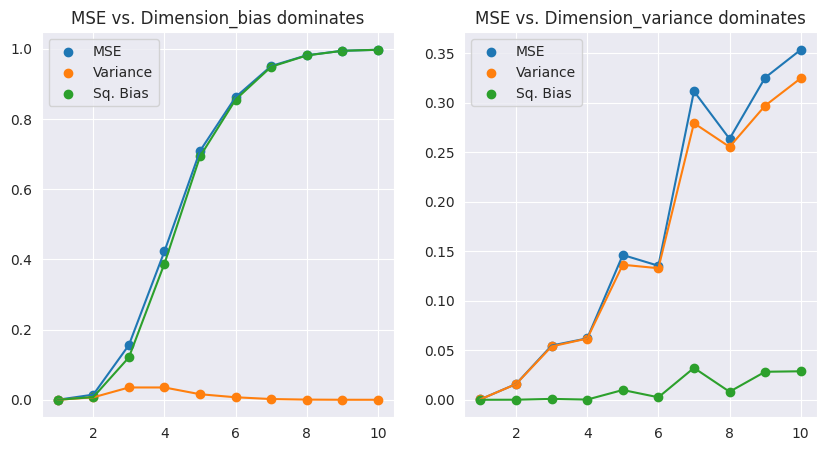

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(np.arange(1,11),mse1,label='MSE')
plt.plot(np.arange(1,11),mse1)
plt.scatter(np.arange(1,11),var1,label='Variance')
plt.plot(np.arange(1,11),var1)
plt.scatter(np.arange(1,11),bias_sq1,label='Sq. Bias')
plt.plot(np.arange(1,11),bias_sq1)
plt.legend()
plt.title("MSE vs. Dimension_bias dominates")

plt.subplot(122)
plt.scatter(np.arange(1,11),mse2,label='MSE')
plt.plot(np.arange(1,11),mse2)
plt.scatter(np.arange(1,11),var2,label='Variance')
plt.plot(np.arange(1,11),var2)
plt.scatter(np.arange(1,11),bias_sq2,label='Sq. Bias')
plt.plot(np.arange(1,11),bias_sq2)
plt.legend()
plt.title("MSE vs. Dimension_variance dominates")
plt.show()

In [ ]:
mse1 = np.zeros(10)
mse2 = np.zeros(10)

mse3 = np.zeros(10)
mse4 = np.zeros(10)

for t in range(10000):
    X = stats.uniform(loc=-1,scale=2).rvs(size=5000)
    X = X.reshape(-1,10)

    for i in range(1,11):
        Xi = X[:,:i]
        eps = stats.norm.rvs(size=500)
        yi_linear = X[:,0] + eps
        yi_cubic = 0.5 * ((X[:,0]+1)**3) + eps
        # 1-NN
        y_hati_1nnLinear = yi_linear[np.argmin(np.sum(Xi**2, axis=1))]
        y_hati_1nnCubic = yi_cubic[np.argmin(np.sum(Xi**2, axis=1))]

        # OLS
        y_hati_olsLinear = 0
        y_hati_olsCubic = 0

        eps0 = stats.norm.rvs(size=1)
        mse1[i-1] += (y_hati_1nnLinear - eps0)**2 # Linear(init 0) + KNN
        mse2[i-1] += (y_hati_1nnCubic - 0.5 - eps0)**2 # Cubic(init 0.5) + KNN
        mse3[i-1] += (y_hati_olsLinear - eps0)**2 # Linear(init 0) + OLS
        mse4[i-1] += (y_hati_olsCubic - 0.5 - eps0)**2 # Cubic(init 0.5) + OLS

mse1/=10000
mse2/=10000
mse3/=10000
mse4/=10000

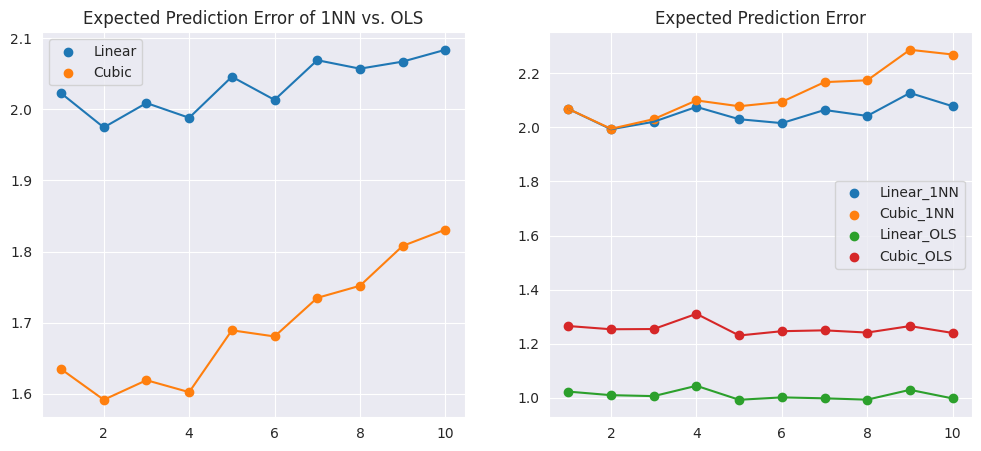

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(np.arange(1,11),mse1/mse3,label='Linear')
plt.plot(np.arange(1,11),mse1/mse3)
plt.scatter(np.arange(1,11),mse2/mse4,label='Cubic')
plt.plot(np.arange(1,11),mse2/mse4)
plt.legend()
plt.title("Expected Prediction Error of 1NN vs. OLS")

plt.subplot(122)
plt.scatter(np.arange(1,11),mse1,label='Linear_1NN')
plt.plot(np.arange(1,11),mse1)
plt.scatter(np.arange(1,11),mse2,label='Cubic_1NN')
plt.plot(np.arange(1,11),mse2)
plt.scatter(np.arange(1,11),mse3,label='Linear_OLS')
plt.plot(np.arange(1,11),mse3)
plt.scatter(np.arange(1,11),mse4,label='Cubic_OLS')
plt.plot(np.arange(1,11),mse4)
plt.legend()
plt.title("Expected Prediction Error")

plt.show()